In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
class Model(nn.Module):
    def __init__(self, in_features=1, h1=20, h2=20, out_features=1):
        super().__init__()

        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, X):
        X = F.sigmoid(self.fc1(X))
        X = F.sigmoid(self.fc2(X))
        X = self.out(X)

        return X

In [ ]:
def f(X):
  y = []

  for i in range(len(X)):
    y.append((math.sin(X[i]))/(5*math.pi*X[i]))

  return y

In [ ]:
X = np.linspace(-2*np.pi, 2*np.pi, 1000)
y = f(X)

X = torch.tensor(X).float().unsqueeze(1)
y = torch.tensor(y).float().unsqueeze(1)

In [ ]:
model = Model()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [ ]:
losses = []
grad_norms = []
iterations = []
epochs = 1000

In [ ]:
def grad_norm(model):
    grad_norm = 0.0
    for p in model.parameters():
        if p.grad is not None:

          grad = (p.grad.cpu().data.numpy()**2).sum()
          grad_norm += grad ** 2

    grad_norm = grad_norm ** .5

    return grad_norm

In [ ]:
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)

    losses.append(loss.detach().numpy())
    grad_norms.append(grad_norm(model))
    iterations.append(i)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

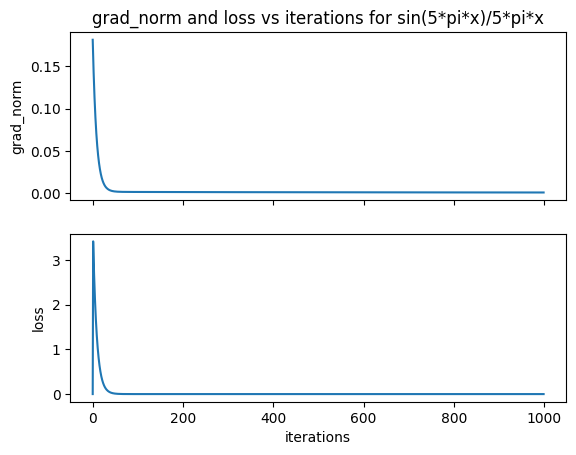

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(iterations, losses)
ax1.set_title('grad_norm and loss vs iterations for sin(5*pi*x)/5*pi*x')
ax1.set_ylabel('grad_norm')
ax2.set_ylabel('loss')
ax2.set_xlabel('iterations')
ax2.plot(iterations, grad_norms)